| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.SELECCION_DE_CARACTERISTICAS.ipynb)|

# **4. BALANCE DE DATOS**

## **Métodos para Balance de datos**

1. **Undersampling (Submuestreo):**

El submuestreo reduce la cantidad de instancias en la clase mayoritaria para igualarla a la cantidad de instancias en la clase minoritaria. Esto se logra seleccionando aleatoriamente un subconjunto de instancias de la clase mayoritaria. El objetivo es equilibrar las proporciones de las clases en el conjunto de datos.

Ejemplo de código Python utilizando la biblioteca `imbalanced-learn`:

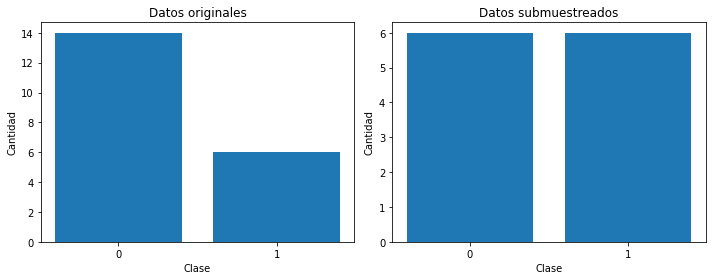

    sepal_length  sepal_width  petal_length  petal_width  target
0            4.9          3.1           1.5          0.1       0
1            4.8          3.4           1.6          0.2       0
2            5.1          3.5           1.4          0.2       0
3            4.8          3.0           1.4          0.1       0
4            5.4          3.9           1.7          0.4       0
5            4.4          2.9           1.4          0.2       0
6            5.8          4.0           1.2          0.2       1
7            5.7          4.4           1.5          0.4       1
8            5.4          3.9           1.3          0.4       1
9            5.1          3.5           1.4          0.3       1
10           5.7          3.8           1.7          0.3       1
11           5.1          3.8           1.5          0.3       1


In [8]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3],
    'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Aplicar submuestreo
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df.drop('target', axis=1), df['target'])

# Crear DataFrame a partir de los datos submuestreados
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Contar las clases en los datos originales y submuestreados
original_counts = df['target'].value_counts().to_dict()
resampled_counts = df_resampled['target'].value_counts().to_dict()

# Crear gráfico de barras para comparar las clases antes y después del submuestreo
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(original_counts.keys(), original_counts.values())
axs[0].set_xticks(list(original_counts.keys()))
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Datos originales')

axs[1].bar(resampled_counts.keys(), resampled_counts.values())
axs[1].set_xticks(list(resampled_counts.keys()))
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Datos submuestreados')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame submuestreado
print(df_resampled)

2. **Oversampling (Sobremuestreo):**

El sobremuestreo aumenta la cantidad de instancias en la clase minoritaria para igualarla a la cantidad de instancias en la clase mayoritaria. Esto se logra replicando o generando nuevas instancias de la clase minoritaria. El objetivo es aumentar la representación de la clase minoritaria en el conjunto de datos.

Ejemplo de código Python utilizando la biblioteca `imbalanced-learn`:

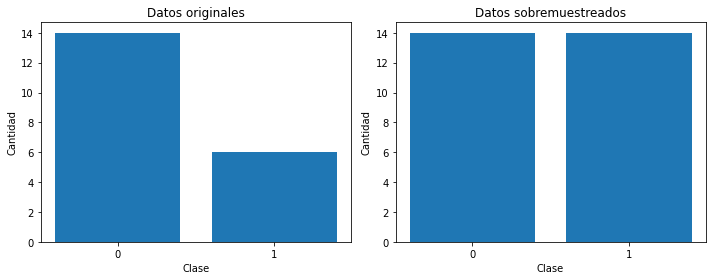

    sepal_length  sepal_width  petal_length  petal_width  target
0            5.1          3.5           1.4          0.2       0
1            4.9          3.0           1.4          0.2       0
2            4.7          3.2           1.3          0.2       0
3            4.6          3.1           1.5          0.2       0
4            5.0          3.6           1.4          0.2       0
5            5.4          3.9           1.7          0.4       0
6            4.6          3.4           1.4          0.3       0
7            5.0          3.4           1.5          0.2       0
8            4.4          2.9           1.4          0.2       0
9            4.9          3.1           1.5          0.1       0
10           5.4          3.7           1.5          0.2       0
11           4.8          3.4           1.6          0.2       0
12           4.8          3.0           1.4          0.1       0
13           4.3          3.0           1.1          0.1       0
14           5.8         

In [9]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3],
    'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Aplicar sobremuestreo
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df.drop('target', axis=1), df['target'])

# Crear DataFrame a partir de los datos sobremuestreados
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Contar las clases en los datos originales y sobremuestreados
original_counts = df['target'].value_counts().to_dict()
resampled_counts = df_resampled['target'].value_counts().to_dict()

# Crear gráfico de barras para comparar las clases antes y después del sobremuestreo
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(original_counts.keys(), original_counts.values())
axs[0].set_xticks(list(original_counts.keys()))
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Datos originales')

axs[1].bar(resampled_counts.keys(), resampled_counts.values())
axs[1].set_xticks(list(resampled_counts.keys()))
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Datos sobremuestreados')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame sobremuestreado
print(df_resampled)

3. **Synthetic Minority Over-sampling Technique (SMOTE):**

SMOTE es un método popular de sobremuestreo que genera nuevas instancias sintéticas de la clase minoritaria mediante interpolación. Crea instancias sintéticas entre las instancias existentes de la clase minoritaria y las instancias de sus vecinos más cercanos. Esto ayuda a evitar el sobreajuste al replicar exactamente las instancias existentes.

Ejemplo de código Python utilizando la biblioteca `imbalanced-learn`:

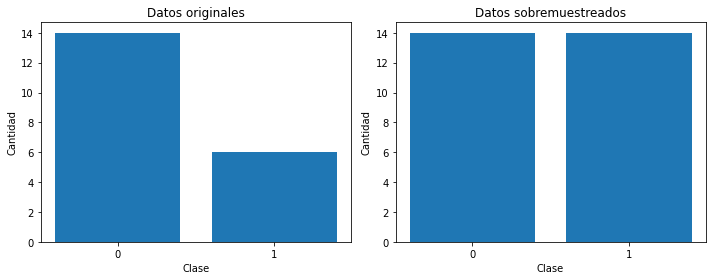

    sepal_length  sepal_width  petal_length  petal_width  target
0       5.100000     3.500000      1.400000     0.200000       0
1       4.900000     3.000000      1.400000     0.200000       0
2       4.700000     3.200000      1.300000     0.200000       0
3       4.600000     3.100000      1.500000     0.200000       0
4       5.000000     3.600000      1.400000     0.200000       0
5       5.400000     3.900000      1.700000     0.400000       0
6       4.600000     3.400000      1.400000     0.300000       0
7       5.000000     3.400000      1.500000     0.200000       0
8       4.400000     2.900000      1.400000     0.200000       0
9       4.900000     3.100000      1.500000     0.100000       0
10      5.400000     3.700000      1.500000     0.200000       0
11      4.800000     3.400000      1.600000     0.200000       0
12      4.800000     3.000000      1.400000     0.100000       0
13      4.300000     3.000000      1.100000     0.100000       0
14      5.800000     4.00

In [7]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3],
    'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('target', axis=1), df['target'])

# Crear DataFrame a partir de los datos sobremuestreados
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Contar las clases en los datos originales y sobremuestreados
original_counts = df['target'].value_counts().to_dict()
resampled_counts = df_resampled['target'].value_counts().to_dict()

# Crear gráfico de barras para comparar las clases antes y después del sobremuestreo
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(original_counts.keys(), original_counts.values())
axs[0].set_xticks(list(original_counts.keys()))
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Datos originales')

axs[1].bar(resampled_counts.keys(), resampled_counts.values())
axs[1].set_xticks(list(resampled_counts.keys()))
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Datos sobremuestreados')

plt.tight_layout()
plt.show()

# Mostrar el DataFrame sobremuestreado
print(df_resampled)

Estos métodos de balanceo ayudan a abordar el problema de clasificación desequilibrada al ajustar las proporciones de las clases en el conjunto de datos, lo que puede mejorar el rendimiento de los modelos de aprendizaje automático al tener una representación más equilibrada de las clases.

![Balance de datos](../img/Balance%20de%20datos.png "Balance de datos")

## **Subsampling**

El Subsampling es una técnica utilizada en el contexto de balanceo de datos desequilibrados, donde se reduce la cantidad de instancias de la clase mayoritaria (clase dominante) para igualarla a la cantidad de instancias de la clase minoritaria (clase minoritaria). Esta técnica se aplica cuando se tienen datos desequilibrados y se desea reducir el sesgo hacia la clase dominante.

El Subsampling puede ser realizado mediante diferentes métodos, como el submuestreo aleatorio (`Random Under-sampling`), donde se seleccionan aleatoriamente un subconjunto de instancias de la clase dominante para igualar el número de instancias de la clase minoritaria.

A continuación, te mostraré un ejemplo de cómo aplicar el submuestreo aleatorio utilizando la biblioteca `imbalanced-learn` en Python:

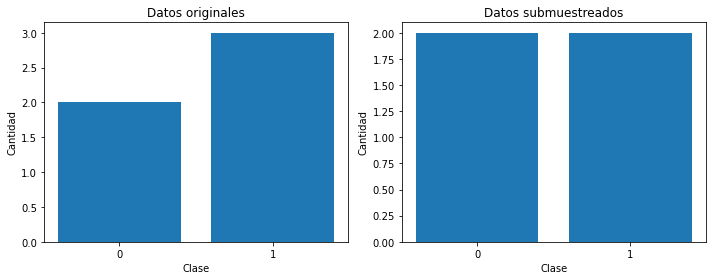

In [6]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


# Crear datos de ejemplo
data = {
    'columna_1': [1, 2, 3, 4, 5],
    'columna_2': ['A', 'B', 'C', 'D', 'E'],
    'columna_objetivo': [0, 0, 1, 1, 1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Preparar los datos dividiendo las características (X) y la variable objetivo (y)
X = df.drop('columna_objetivo', axis=1)  # Reemplaza 'columna_objetivo' por el nombre correcto de la columna objetivo
y = df['columna_objetivo']  # Reemplaza 'columna_objetivo' por el nombre correcto de la columna objetivo

# Aplicar submuestreo aleatorio
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Contar las clases en los datos originales y submuestreados
unique, counts = np.unique(y, return_counts=True)
original_counts = dict(zip(unique, counts))

unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
resampled_counts = dict(zip(unique_resampled, counts_resampled))

# Crear gráfico de barras para comparar las clases antes y después del submuestreo
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].bar(original_counts.keys(), original_counts.values())
axs[0].set_xticks(list(original_counts.keys()))
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Datos originales')

axs[1].bar(resampled_counts.keys(), resampled_counts.values())
axs[1].set_xticks(list(resampled_counts.keys()))
axs[1].set_xlabel('Clase')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Datos submuestreados')

plt.tight_layout()
plt.show()

En este ejemplo, se carga un conjunto de datos desequilibrado en un DataFrame de Pandas. Luego, se aplica el submuestreo aleatorio utilizando `RandomUnderSampler` de la biblioteca `imbalanced-learn`. A continuación, se cuentan las instancias por clase en los datos originales y en los datos submuestreados, y se muestra un gráfico de barras comparando las clases antes y después del submuestreo.

Espero que esto te ayude a comprender el concepto de Subsampling y cómo aplicarlo en Python utilizando el submuestreo aleatorio.

## **Oversampling, SMOTE**

El sobremuestreo (oversampling) es una técnica utilizada para abordar el desequilibrio de clases en conjuntos de datos, donde una clase minoritaria tiene menos ejemplos en comparación con la clase mayoritaria. El objetivo del sobremuestreo es generar ejemplos sintéticos de la clase minoritaria para equilibrar las proporciones de las clases en el conjunto de datos.

Una técnica popular de sobremuestreo es SMOTE (Synthetic Minority Over-sampling Technique), que crea ejemplos sintéticos interpolando características de ejemplos de la clase minoritaria cercanos. SMOTE selecciona aleatoriamente un ejemplo de la clase minoritaria y encuentra sus vecinos más cercanos. Luego, genera nuevos ejemplos al tomar combinaciones lineales de las características de ese ejemplo y sus vecinos. Este proceso se repite para generar la cantidad deseada de ejemplos sintéticos.

Aquí tienes un ejemplo de código en Python utilizando la biblioteca `imbalanced-learn` para aplicar SMOTE y visualizar el efecto del sobremuestreo:

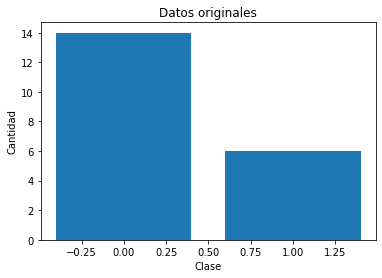

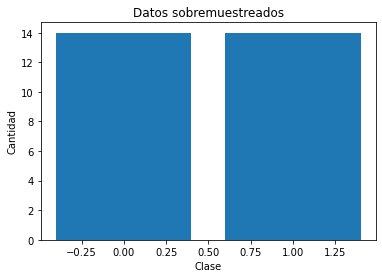

    sepal_length  sepal_width  petal_length  petal_width  target
0       5.100000     3.500000      1.400000     0.200000       0
1       4.900000     3.000000      1.400000     0.200000       0
2       4.700000     3.200000      1.300000     0.200000       0
3       4.600000     3.100000      1.500000     0.200000       0
4       5.000000     3.600000      1.400000     0.200000       0
5       5.400000     3.900000      1.700000     0.400000       0
6       4.600000     3.400000      1.400000     0.300000       0
7       5.000000     3.400000      1.500000     0.200000       0
8       4.400000     2.900000      1.400000     0.200000       0
9       4.900000     3.100000      1.500000     0.100000       0
10      5.400000     3.700000      1.500000     0.200000       0
11      4.800000     3.400000      1.600000     0.200000       0
12      4.800000     3.000000      1.400000     0.100000       0
13      4.300000     3.000000      1.100000     0.100000       0
14      5.800000     4.00

In [10]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3],
    'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Contar las clases en los datos originales
original_counts = df['target'].value_counts().to_dict()

# Crear gráfico de barras para las clases originales
plt.bar(original_counts.keys(), original_counts.values())
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Datos originales')
plt.show()

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('target', axis=1), df['target'])

# Crear DataFrame a partir de los datos sobremuestreados
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Contar las clases en los datos sobremuestreados
resampled_counts = df_resampled['target'].value_counts().to_dict()

# Crear gráfico de barras para las clases sobremuestreadas
plt.bar(resampled_counts.keys(), resampled_counts.values())
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Datos sobremuestreados')
plt.show()

# Mostrar el DataFrame sobremuestreado
print(df_resampled)

En este ejemplo, los datos originales contienen una clase minoritaria (target = 1) con solo 6 ejemplos, mientras que la clase mayoritaria (target = 0) tiene 14 ejemplos. Después de aplicar SMOTE, se generan ejemplos sintéticos para la clase minoritaria, lo que resulta en un conjunto de datos equilibrado con 14 ejemplos para cada clase. Los gráficos de barras muestran la distribución de las clases antes y después del sobremuestreo. El DataFrame sobremuestreado se imprime en la consola.

![Oversampling, SMOTE](../img/Oversampling%2C%20SMOTE.png "Oversampling, SMOTE")

## **Escalamiento y normalización**

El escalamiento y la normalización son técnicas utilizadas para ajustar los valores de las características de un conjunto de datos. Estas técnicas son especialmente útiles en algoritmos de aprendizaje automático que se basan en cálculos numéricos, como la regresión lineal, el algoritmo k-means o las redes neuronales.

El escalamiento se refiere a la transformación de los valores de las características para que se ajusten a un rango específico. La normalización se refiere a la transformación de los valores de las características para que tengan una distribución normal o gaussiana.

Aquí tienes un ejemplo de código en Python utilizando la biblioteca scikit-learn para aplicar el escalamiento y la normalización a un conjunto de datos y visualizar el efecto en las características:

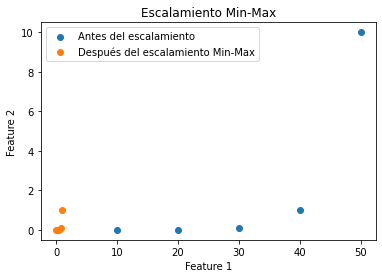

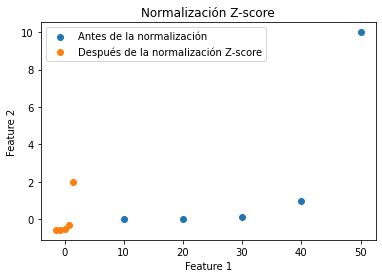

Escalamiento Min-Max:
   feature1  feature2
0      0.00  0.000000
1      0.25  0.000900
2      0.50  0.009901
3      0.75  0.099910
4      1.00  1.000000
Normalización Z-score:
   feature1  feature2
0 -1.414214 -0.568533
1 -0.707107 -0.566229
2  0.000000 -0.543193
3  0.707107 -0.312831
4  1.414214  1.990787


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [0.001, 0.01, 0.1, 1, 10],
}

# Crear DataFrame
df = pd.DataFrame(data)

# Escalamiento Min-Max
scaler = MinMaxScaler()
df_scaled_minmax = scaler.fit_transform(df)

# Crear gráfico de dispersión antes del escalamiento
plt.scatter(df['feature1'], df['feature2'], label='Antes del escalamiento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Crear gráfico de dispersión después del escalamiento Min-Max
plt.scatter(df_scaled_minmax[:, 0], df_scaled_minmax[:, 1], label='Después del escalamiento Min-Max')
plt.legend()
plt.title('Escalamiento Min-Max')
plt.show()

# Normalización Z-score
scaler = StandardScaler()
df_scaled_zscore = scaler.fit_transform(df)

# Crear gráfico de dispersión antes de la normalización
plt.scatter(df['feature1'], df['feature2'], label='Antes de la normalización')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Crear gráfico de dispersión después de la normalización Z-score
plt.scatter(df_scaled_zscore[:, 0], df_scaled_zscore[:, 1], label='Después de la normalización Z-score')
plt.legend()
plt.title('Normalización Z-score')
plt.show()

# Mostrar los DataFrames escalados y normalizados
df_scaled_minmax = pd.DataFrame(df_scaled_minmax, columns=df.columns)
df_scaled_zscore = pd.DataFrame(df_scaled_zscore, columns=df.columns)
print("Escalamiento Min-Max:")
print(df_scaled_minmax)
print("Normalización Z-score:")
print(df_scaled_zscore)

En este ejemplo, tenemos un conjunto de datos con dos características: feature1 y feature2. Aplicamos dos técnicas de transformación: el escalamiento Min-Max y la normalización Z-score.

El escalamiento Min-Max ajusta los valores de las características al rango [0, 1]. En el gráfico de dispersión antes del escalamiento, los puntos están dispersos a lo largo de diferentes escalas. Después del escalamiento Min-Max, los valores se ajustan al rango [0, 1], lo que hace que los puntos estén más cerca unos de otros y se vean más compactos.

La normalización Z-score ajusta los valores de las características para tener una media de 0 y una desviación estándar de 1. En el gráfico de dispersión antes de la normalización, los puntos están dispersos y no siguen una distribución específica. Después de la normalización Z-score, los valores se transforman para tener una distribución más cercana a la normal, con una media de 0 y una desviación estándar de 1.

Los DataFrames resultantes de los escalamientos y normalizaciones se imprimen en la consola.

## **Validación Cruzada**

La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático y estimar su capacidad para generalizar a datos no vistos. Consiste en dividir el conjunto de datos en subconjuntos de entrenamiento y prueba de manera repetida, lo que permite obtener múltiples medidas de rendimiento y reducir la dependencia de una sola división de datos.

Aquí tienes un ejemplo de código en Python utilizando la biblioteca scikit-learn para realizar la validación cruzada en un modelo de regresión:

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Cargar los datos de viviendas de California
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar la validación cruzada con 5 divisiones
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los puntajes en valores positivos
mse_scores = -scores

# Imprimir los puntajes de error cuadrático medio
print("Error cuadrático medio para cada división:")
print(mse_scores)

# Imprimir el error cuadrático medio promedio y la desviación estándar
print("Error cuadrático medio promedio: ", np.mean(mse_scores))
print("Desviación estándar del error cuadrático medio: ", np.std(mse_scores))

Error cuadrático medio para cada división:
[0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
Error cuadrático medio promedio:  0.5582901717686795
Desviación estándar del error cuadrático medio:  0.06560199778304107


Finalmente, se imprimen los puntajes de error cuadrático medio para cada división, así como el error cuadrático medio promedio y la desviación estándar de los puntajes.

La validación cruzada proporciona una estimación más robusta y confiable del rendimiento del modelo, ya que utiliza múltiples divisiones de los datos para evaluar su capacidad de generalización. Esto es especialmente útil cuando se tienen conjuntos de datos pequeños o cuando se desea obtener una estimación más precisa del rendimiento del modelo.

![Validación Cruzada](../img/Validaci%C3%B3n%20Cruzada.jpg "Validación Cruzada")

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.SELECCION_DE_CARACTERISTICAS.ipynb)|